In [2]:
import zarr
from skimage import io 

In [9]:
for i in range(35):
    path = "/Users/thomasathey/Documents/mimlab/mouselight/input/images/firstn_quantitative/zarr/" + str(i) + ".zarr"
    z = zarr.open(path)
    img = z[:,:,:]

    img8 = (img/256).astype('uint8')
    outpath = "/Users/thomasathey/Documents/mimlab/mouselight/input/images/firstn_quantitative/tif_8bit/" + str(i) + "_8bit.tif"
    io.imsave(outpath, img8)
    

/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_100/1253890124.py:8: UserWarning: /Users/thomasathey/Documents/mimlab/mouselight/input/images/firstn_quantitative/tif_8bit/0_8bit.tif is a low contrast image
  io.imsave(outpath, img8)
/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_100/1253890124.py:8: UserWarning: /Users/thomasathey/Documents/mimlab/mouselight/input/images/firstn_quantitative/tif_8bit/1_8bit.tif is a low contrast image
  io.imsave(outpath, img8)
/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_100/1253890124.py:8: UserWarning: /Users/thomasathey/Documents/mimlab/mouselight/input/images/firstn_quantitative/tif_8bit/2_8bit.tif is a low contrast image
  io.imsave(outpath, img8)
/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_100/1253890124.py:8: UserWarning: /Users/thomasathey/Documents/mimlab/mouselight/input/images/firstn_quantitative/tif_8bit/3_8bit.tif is a low contrast image
  io.imsave(outpath, img8)
/var/folders/fq/9t66hqz5

In [ ]:
from scipy.stats import fisher_exact

fisher_exact([[7,13],[1,19]])

{'whiskers': [<matplotlib.lines.Line2D at 0x12e7cf550>,
 'caps': [<matplotlib.lines.Line2D at 0x12e7cfc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e7cf1c0>,
 'medians': [<matplotlib.lines.Line2D at 0x12e7db3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e7db760>,
 'means': []}

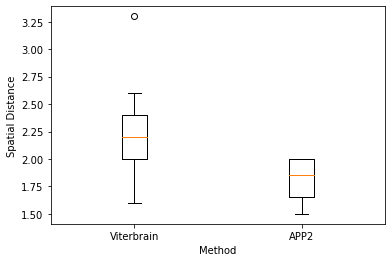

In [8]:
data_sd = [[1.6,2.6,3.3,1.6,2.5,1.9,2.3,2.2, 2.2, 2.1, 2.1], [1.7,2.0,2.0,1.5]]

fig7, ax7 = plt.subplots()
ax7.set_title('')
ax7.set_xlabel("Method")
ax7.set_ylabel("Spatial Distance")
ax7.boxplot(data_sd, labels=["Viterbrain", "APP2"])